(20000, 3072)
(20000,)
Shape of X: (20000, 32, 32, 3) 
 Shape of Y: (20000,)


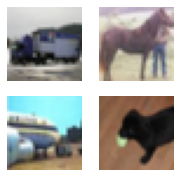

In [6]:
# Part (a), (b), (c), (d) and (e)
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

cifar_10 = fetch_openml("CIFAR_10_small")
cifar_10.keys()

X, Y = cifar_10['data'], cifar_10['target']
print(X.shape)
print(Y.shape)

#Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X = X.reshape(20000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
print('Shape of X:', X.shape, '\n', 'Shape of Y:', Y.shape)


# Displaying images
fig, axes1 = plt.subplots(2,2,figsize=(3,3))
for j in range(2):
    for k in range(2):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])


In [7]:
# Part (f) and (g)

# Setting inverse of regularization strengths
C = [0.001, 0.01, 0.1, 0.5, 0.9]
params = dict(C = C)



# Model with l1 regularization
    
log_reg_model1 = LogisticRegression(penalty = 'l1', multi_class = 'multinomial', solver = 'saga')

model1 = GridSearchCV(log_reg_model1, params, cv = 3, verbose = 1)
model1.fit(X_train, Y_train)

# View best hyperparameters
print('Best C for l1 regularization:', model1.best_estimator_.get_params()['C'])



# Training loss with l1 regularization
Y_pred_train_l1 = model1.predict_proba(X_train)
Y_pred_test_l1 = model1.predict_proba(X_test)

print ('The training loss with l1 regularization is - ', log_loss(Y_train, Y_pred_train_l1))
print ('The test loss with l1 regularization is - ', log_loss(Y_test, Y_pred_test_l1))
print('The accuracy score for model1 is ', model1.score(X_test, Y_test) )




Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Convergence

Best C for l1 regularization: 0.1
The training loss with l1 regularization is -  1.5020517894554675
The test loss with l1 regularization is -  1.7639002653440645
The accuracy score for model1 is  0.3992


In [8]:
# Model with l2 regularization

log_reg_model2 = LogisticRegression(penalty = 'l2', multi_class = 'multinomial', solver = 'saga')


model2 = GridSearchCV(log_reg_model2, params, cv = 3, verbose = 1)
model2.fit(X_train, Y_train)

# View best hyperparameters
print('Best C for l2 regularization:', model2.best_estimator_.get_params()['C'])

# Training loss with l2 regularization
Y_pred_train_l2 = model2.predict_proba(X_train)
Y_pred_test_l2 = model2.predict_proba(X_test)

print ('The training loss with l2 regularization is - ', log_loss(Y_train, Y_pred_train_l2))
print ('The test loss with l2 regularization is - ', log_loss(Y_test, Y_pred_test_l2))
print('The accuracy score for model2 is ', model2.score(X_test, Y_test)) 



Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Convergence

Best C for l2 regularization: 0.001
The training loss with l2 regularization is -  1.5535432995658645
The test loss with l2 regularization is -  1.7401204163420931
The accuracy score for model2 is  0.4024


In [15]:
#Part (h)

#Checking for sparse solution with l1 regularization by retaining the accuracy

from sklearn.linear_model import LogisticRegressionCV
log_reg_model1_sparse = {}
C = [0.1]
dict_C_loss1 = {}
dict_C_accuracy1 = {}
dict_C_coef1 = {}
index = 0


while (C[0] >= 0.00001):
  log_reg_model1_sparse[index] = LogisticRegressionCV(Cs = C, penalty = 'l1', multi_class = 'multinomial', solver = 'saga', cv = 3)
  log_reg_model1_sparse[index].fit(X_train, Y_train)
  Y_pred_test_l1 = log_reg_model1_sparse[index].predict_proba(X_test)
  dict_C_loss1[C[0]] = log_loss(Y_test, Y_pred_test_l1)
  dict_C_accuracy1[C[0]] = log_reg_model1_sparse[index].score(X_test, Y_test)
  dict_C_coef1[C[0]] =  log_reg_model1_sparse[index].coef_
  print('With l1 regularization and C = ', C[0], ', the accuracy is ', log_reg_model1_sparse[index].score(X_test, Y_test))
  index = index + 1
  C[0] = C[0]/10
  

/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


With l1 regularization and C =  0.1 , the accuracy is  0.4008


/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


With l1 regularization and C =  0.01 , the accuracy is  0.3762


/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


With l1 regularization and C =  0.001 , the accuracy is  0.161
With l1 regularization and C =  0.0001 , the accuracy is  0.0966
With l1 regularization and C =  1e-05 , the accuracy is  0.1002


Our best C was 0.1 from the previous calculation for l1 regularization. Currently our accuracy with C=0.1 is 0.4008 (here, the accuracy changed by a tiny fraction because of the randomness, but we will still consider this as our basis). After running logistic regression with l1 norm and cross validation for C less than 0.1, it can be seen that by replacing C with 0.01, our accuracy is not affected significantly and its value is equal to 0.3762. Hence with C = 0.01, we can get sparser solution.

In [25]:
best_sparse_model_l1 = LogisticRegressionCV(Cs = [.01], penalty = 'l1', multi_class = 'multinomial', solver = 'saga', cv = 3)
best_sparse_model_l1.fit(X_train, Y_train)
print('Thus best sparse logistic regression model solution with l1 norm and accuracy 0.3762 is -', best_sparse_model_l1)

/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Thus best sparse logistic regression model solution with l1 norm and accuracy 0.3762 is - LogisticRegressionCV(Cs=[0.01], class_weight=None, cv=3, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='multinomial', n_jobs=None,
                     penalty='l1', random_state=None, refit=True, scoring=None,
                     solver='saga', tol=0.0001, verbose=0)


/Users/prajwal/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [16]:

#Checking for sparse solution with l2 regularization by retaining the accuracy

from sklearn.linear_model import LogisticRegressionCV
log_reg_model2_sparse = {}
C = [0.001]
dict_C_loss2 = {}
dict_C_accuracy2 = {}
dict_C_coef2 = {}
index = 0


while (C[0] >= 0.0000001):
  log_reg_model2_sparse[index] = LogisticRegressionCV(Cs = C, penalty = 'l2', multi_class = 'multinomial', solver = 'saga', cv = 3)
  log_reg_model2_sparse[index].fit(X_train, Y_train)
  Y_pred_test_l2 = log_reg_model2_sparse[index].predict_proba(X_test)
  dict_C_loss2[C[0]] = log_loss(Y_test, Y_pred_test_l2)
  dict_C_accuracy2[C[0]] = log_reg_model2_sparse[index].score(X_test, Y_test)
  dict_C_coef2[C[0]] =  log_reg_model2_sparse[index].coef_
  print('With l2 regularization and C = ', C[0], ', the accuracy is ', log_reg_model2_sparse[index].score(X_test, Y_test))
  C[0] = C[0]/10
  index = index + 1   


With l2 regularization and C =  0.001 , the accuracy is  0.4022
With l2 regularization and C =  0.0001 , the accuracy is  0.3962
With l2 regularization and C =  1e-05 , the accuracy is  0.353
With l2 regularization and C =  1.0000000000000002e-06 , the accuracy is  0.2864
With l2 regularization and C =  1.0000000000000002e-07 , the accuracy is  0.2134


Our best C was 0.001 from the previous calculation for l2 regularization. Currently our accuracy with C=0.001 is 0.4022 (here, the accuracy changed by a tiny fraction because of the randomness, but we will still consider this as our basis). After running logistic regression with l2 norm and cross validation for C less than 0.001, it can be seen that by replacing C with 0.0001, our accuracy is not affected significantly and its value is equal to 0.3962. Hence with C = 0.0001, we can get sparser solution.

In [ ]:
best_sparse_model_l2 = LogisticRegressionCV(Cs = [0.0001], penalty = 'l2', multi_class = 'multinomial', solver = 'saga', cv = 3)
best_sparse_model_l2.fit(X_train, Y_train)
print('Thus best sparse logistic regression model solution with l2 norm and accuracy 0.3962 is -', best_sparse_model_l2)